In [1469]:
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
from pandas import read_csv
import seaborn as sns


data = pd.read_csv('final_data.csv')

In [1470]:
data['date'] = pd.to_datetime(data['date']) 
data['date']=data['date'].map(dt.datetime.toordinal)

(5.0, 0.0)

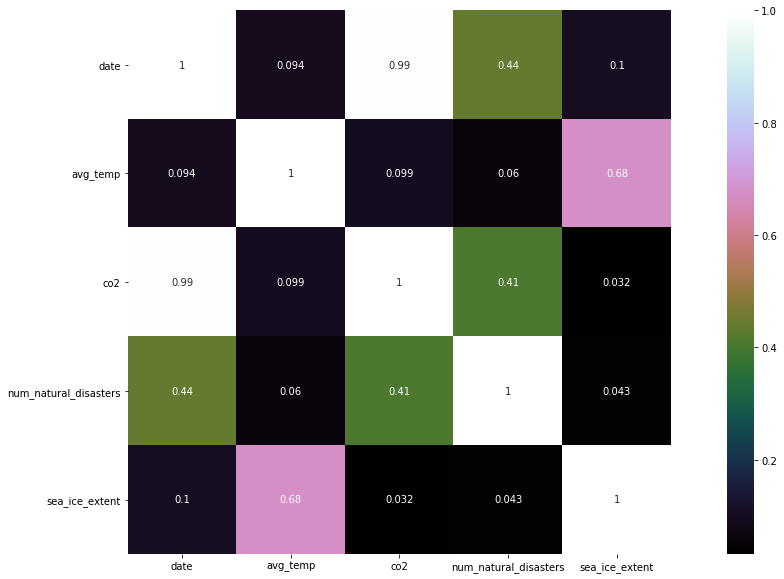

In [1471]:
data = data.iloc[: , 1:]

corr_mat=data.corr(method='pearson')
plt.figure(figsize=(20,10))
g = sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
g.set_ylim(sorted(g.get_xlim(), reverse=True))

In [1472]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold

In [1473]:
def MAPE(y_actual,y_Predicted):
    mape = np.mean(np.abs((y_actual - y_Predicted)/y_actual))*100
    return mape

In [1474]:
new_data = data.values
X, y = new_data[:, :-1], new_data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
alphas = np.arange(0, 1, 0.001)
coefs = list()
mape_list = list()
mse_list = list()

for a in alphas:
    ridge = RidgeCV(alphas=[a],cv=cv, normalize = True).fit(X_train, y_train)
    coefs.append(ridge.coef_)
    ridge_predict = ridge.predict(X_test)
    Ridge_MAPE = MAPE(y_test,ridge_predict)
    Ridge_MAE = mean_squared_error(y_test,ridge_predict)
    mape_list.append(Ridge_MAPE)
    mse_list.append(Ridge_MAE)
    if Ridge_MAPE == min(mape_list):
        best_ridge = ridge
    

print("MAPE value: ", min(mape_list))
Accuracy = 100 - min(mape_list)
print('Accuracy of Ridge Regression: {:0.2f}%.'.format(Accuracy))
print('Coefficients:')

print('Best Alpha: %f' % best_ridge.alpha_)

print("MAE: ", mean_absolute_error(y_test, best_ridge.predict(X_test)))

print('Coefficients:')
pd.Series(best_ridge.coef_, index = data.iloc[:, :-1].columns)

MAPE value:  27.502280332800243
Accuracy of Ridge Regression: 72.50%.
Coefficients:
Best Alpha: 0.000000
MAE:  2.3378221961110137
Coefficients:


date                     0.005444
avg_temp                 0.958163
co2                     -1.088449
num_natural_disasters   -0.002879
dtype: float64

In [1475]:
print('R squared training set', round(best_ridge.score(X_train, y_train), 5))
print('R squared test set', round(best_ridge.score(X_test, y_test), 5))

mean_squared_error(y_test, best_ridge.predict(X_test))

R squared training set 0.72662
R squared test set 0.71475


8.677930341370995

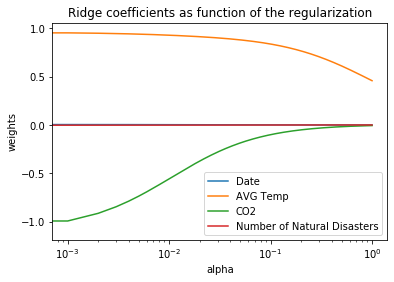

In [1476]:
coefs = np.array(coefs)
plt.semilogx(alphas,coefs)
plt.title('Ridge coefficients as function of the regularization')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(['Date', 'AVG Temp', 'CO2', 'Number of Natural Disasters'])

Text(0, 0.5, 'MAPE(%)')

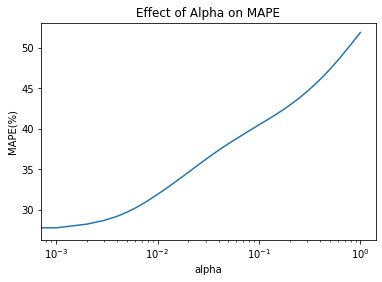

In [1477]:
mape_list = np.array(mape_list)
plt.semilogx(alphas, mape_list)
plt.title('Effect of Alpha on MAPE')
plt.xlabel('alpha')
plt.ylabel('MAPE(%)')

Text(0, 0.5, 'MSE')

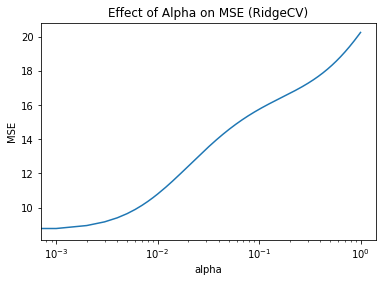

In [1478]:
mse_list = np.array(mse_list)
plt.semilogx(alphas, mse_list)
plt.title('Effect of Alpha on MSE (RidgeCV)')
plt.xlabel('alpha')
plt.ylabel('MSE')